In [82]:
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np 
# import scienceplots
# plt.style.use(['science', 'grid'])

In [87]:
# Read file

fname = './fort.12'
with open(fname, 'r') as file: 
    line = file.readline()
    num_timesteps, num_spatial_points, isep = map(int, line.split())
    times = np.linspace(0, 1, num_timesteps)
    line = file.readline()
    x_grid = np.array(list(map(float, line.split())))
    # there is an empty line, 
    line = file.readline()
    total_solution = np.zeros((num_timesteps, num_spatial_points))
    for i in range(num_timesteps):
        line = file.readline()
        # split the line and convert to float
        y = np.array(list(map(float, line.split())))
        total_solution[i] = y

/tmp/ipykernel_474326/1183974873.py:9: RuntimeWarning: invalid value encountered in divide
  axs[1].scatter(times[:50], total_solution[:50, 0] / total_solution[:50, isep], label=f'x={x_grid[isep]}')


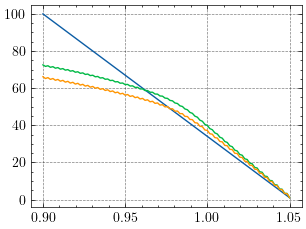

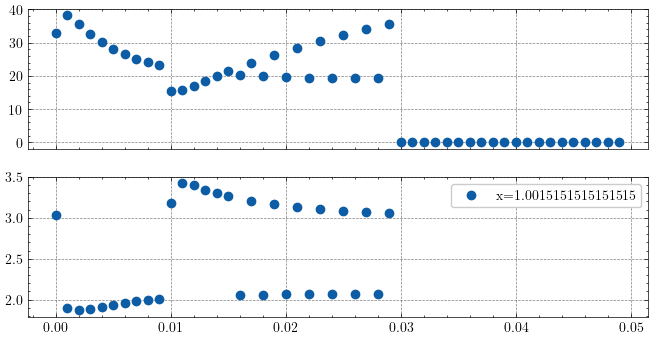

In [88]:
plt.plot(x_grid, total_solution[0], label='t=0')
plt.plot(x_grid, total_solution[1], label='t=1')
plt.plot(x_grid, total_solution[2], label='t=1')


fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 4)) 

axs[0].scatter(times[:50], total_solution[:50, isep], label=f'x={x_grid[isep]}')
axs[1].scatter(times[:50], total_solution[:50, 0] / total_solution[:50, isep], label=f'x={x_grid[isep]}')
plt.legend()
plt.show()

/tmp/ipykernel_474326/3553430913.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hot')  # Choose a colormap


(0.0, 108.83269173845326)

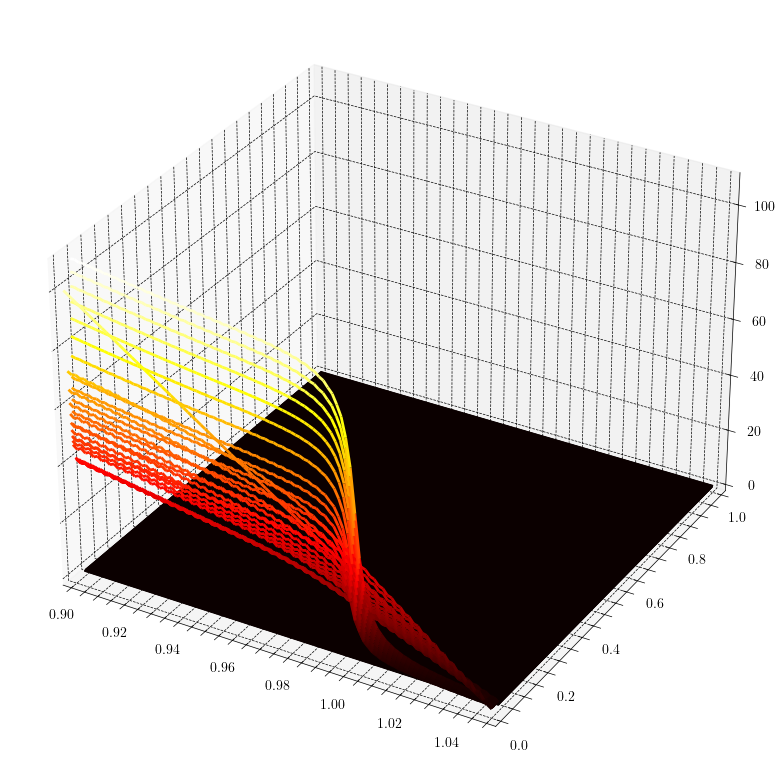

In [90]:
#takes around 30 seconds for 1000 time steps and 100 points 
# import Line3DCollection

fig = plt.figure(figsize=(10, 10))
dax = fig.add_subplot(1, 1, 1, projection='3d')

norm = Normalize(vmin=np.min(total_solution), vmax=np.max(total_solution))
cmap = cm.get_cmap('hot')  # Choose a colormap

segments, colors = [], []

for tidx, t in enumerate(times):
    timearray = np.ones_like(x_grid) * t
    z_values = total_solution[tidx]

    points = np.array([x_grid, timearray, z_values]).T.reshape(-1, 1, 3)
    segs = np.concatenate([points[:-1], points[1:]], axis=1)
    segments.extend(segs)

    segment_colors = cmap(norm(z_values))
    colors.extend(segment_colors[:-1])

avg_z_values = [np.mean(seg[:, 2]) for seg in segments]
sorted_indices = np.argsort(avg_z_values)

sorted_segments = [segments[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

lc = Line3DCollection(sorted_segments, colors=sorted_colors, linewidth=2)

dax.add_collection(lc)

dax.set_xlim(np.min(x_grid), np.max(x_grid))
dax.set_ylim(np.min(times), np.max(times))
dax.set_zlim(np.min(total_solution), np.max(total_solution))

